### Provide required inputs

1. the schema
2. its compling dataset

In [1]:
schema = "./Examples/Charging_Stations/schema.json"
dataset = "./Examples/Charging_Stations/data.csv"

### Import the right extractor according to provided inputs

Presently, we propose two extractors:
1. read_jsonSchema_geojsonData
2. read_tableSchema_csvData

In [2]:
from library.read import read_tableSchema_csvData

From here, we start the **ETL** process:
1. **E**xtract
2. **T**ransform
3. **L**oad

### 1. Extractor: Bundle graph initialisation

In [3]:
b0 = read_tableSchema_csvData(schema, dataset, "id_station_local", "station")

##### Overview of the Global Semantic Model

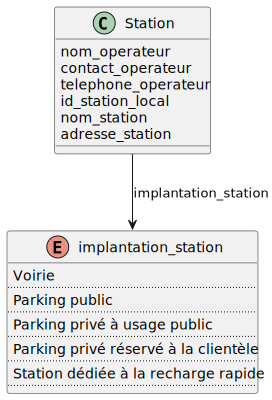

In [4]:
b0.show_semantic_model(True)

### 2. Transformers

In this example, we apply two transformers:
1. split
2. apply

#### 2.1 Split transformer

We apply the `split` transformer on the *Station* class bundle with:
- instances class identifier: *nom_operateur*
- attributes:
    - *contact_operateur*
    - *telephone_operateur*
- name of the new bundle [optional]: *operateur* 

In [5]:
b1 = b0.split(class_id= "nom_operateur", class_attributes=["contact_operateur","telephone_operateur"], new_class_name="operateur")

##### Overview of the Global Semantic Model after `split` transformer

We apply `show_semantic_model` on the root bundle with `deep = True` to show the entire model

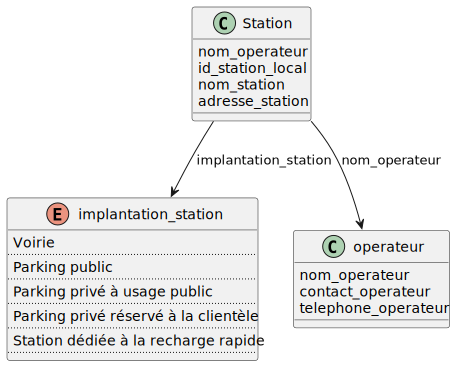

In [6]:
b0.show_semantic_model(True)

##### Overview of the *Station* dataset

In [7]:
b0.dataset

,nom_operateur,id_station_local,nom_station,implantation_station,adresse_station,geometry
0,Borneco | FR*BHM,756453,BornEco/63dcef1cde530c3ec2928c1e,Voirie,"3 Place Maurice de Sully, Sully-sur-Loire 45...",None
1,Borneco | FR*BHM,756453,BornEco/63dcef1cde530c3ec2928c1e,Voirie,"3 Place Maurice de Sully, Sully-sur-Loire 45...",None
2,Borneco | FR*BHM,767307,BornEco/63dcefa3de530c3ec2928c39,Voirie,"Place des Jeux, Donnemarie-Dontilly 77520 ...",None
3,Borneco | FR*BHM,767307,BornEco/63dcefa3de530c3ec2928c39,Voirie,"Place des Jeux, Donnemarie-Dontilly 77520 ...",None
4,Borneco | FR*BHM,782313,BornEco/64255ebeceade60b493082cc,Voirie,"38 Avenue de New York, Paris 75116 France",None
...,...,...,...,...,...,...
95,evZen | FR*EVZ,377778,CARF - Bornes Publiques/8C44E3B4-E0FC-406A-A25...,Parking public,"50 Promenade de la Mer, Menton 06500 France",None
96,evZen | FR*EVZ,377796,CARF - Bornes Publiques/8CF2C967-C80C-4463-B4B...,Parking public,"Avenue de la Paix, Roquebrune-Cap-Martin 06...",None
97,evZen | FR*EVZ,377796,CARF - Bornes Publiques/8CF2C967-C80C-4463-B4B...,Parking public,"Avenue de la Paix, Roquebrune-Cap-Martin 06...",None
98,evZen | FR*EVZ,612871,CARF - Bornes Publiques/97BBD38A-F72F-4418-916...,Parking public,Promenade du Maréchal Leclerc de Hautecloque...,None


##### Overview of the *operateur* Semantic Model

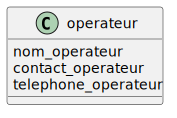

In [8]:
b1.show_semantic_model(True) # deep = True or deep = False has no impact here 

##### Overview of the *operateur* dataset

In [9]:
b1.dataset

,nom_operateur,contact_operateur,telephone_operateur
0,Borneco | FR*BHM,technique.borneco@gmail.com,33123456789
1,Borneco | FR*BHM,technique.borneco@gmail.com,33123456789
2,Borneco | FR*BHM,technique.borneco@gmail.com,33123456789
3,Borneco | FR*BHM,technique.borneco@gmail.com,33123456789
4,Borneco | FR*BHM,technique.borneco@gmail.com,33123456789
...,...,...,...
95,evZen | FR*EVZ,support@evzen.com,33123456789
96,evZen | FR*EVZ,support@evzen.com,33123456789
97,evZen | FR*EVZ,support@evzen.com,33123456789
98,evZen | FR*EVZ,support@evzen.com,33123456789


#### 2.2 Apply transformer

In [10]:
import pandas as pd

Values of *adresse_station* column is composed of distinct information: street, locality, postalcode and country. 
We want to create a column (respectively an attribute) to each information to comply with schema.org ontology.

Technically, we use `apply` transformer twice.
1. to split between the street and the rest of the address
2. to split the rest of the address  

In [11]:
b0.apply(lambda x : pd.Series(x['adresse_station'].split(',')),{"adresse_rue": 'string', "adresse_ville_codepostal": 'string'})
b0.dataset

,nom_operateur,id_station_local,nom_station,implantation_station,adresse_station,geometry,adresse_rue,adresse_ville_codepostal
0,Borneco | FR*BHM,756453,BornEco/63dcef1cde530c3ec2928c1e,Voirie,"3 Place Maurice de Sully, Sully-sur-Loire 45...",None,3 Place Maurice de Sully,Sully-sur-Loire 45600 France
1,Borneco | FR*BHM,756453,BornEco/63dcef1cde530c3ec2928c1e,Voirie,"3 Place Maurice de Sully, Sully-sur-Loire 45...",None,3 Place Maurice de Sully,Sully-sur-Loire 45600 France
2,Borneco | FR*BHM,767307,BornEco/63dcefa3de530c3ec2928c39,Voirie,"Place des Jeux, Donnemarie-Dontilly 77520 ...",None,Place des Jeux,Donnemarie-Dontilly 77520 France
3,Borneco | FR*BHM,767307,BornEco/63dcefa3de530c3ec2928c39,Voirie,"Place des Jeux, Donnemarie-Dontilly 77520 ...",None,Place des Jeux,Donnemarie-Dontilly 77520 France
4,Borneco | FR*BHM,782313,BornEco/64255ebeceade60b493082cc,Voirie,"38 Avenue de New York, Paris 75116 France",None,38 Avenue de New York,Paris 75116 France
...,...,...,...,...,...,...,...,...
95,evZen | FR*EVZ,377778,CARF - Bornes Publiques/8C44E3B4-E0FC-406A-A25...,Parking public,"50 Promenade de la Mer, Menton 06500 France",None,50 Promenade de la Mer,Menton 06500 France
96,evZen | FR*EVZ,377796,CARF - Bornes Publiques/8CF2C967-C80C-4463-B4B...,Parking public,"Avenue de la Paix, Roquebrune-Cap-Martin 06...",None,Avenue de la Paix,Roquebrune-Cap-Martin 06190 France
97,evZen | FR*EVZ,377796,CARF - Bornes Publiques/8CF2C967-C80C-4463-B4B...,Parking public,"Avenue de la Paix, Roquebrune-Cap-Martin 06...",None,Avenue de la Paix,Roquebrune-Cap-Martin 06190 France
98,evZen | FR*EVZ,612871,CARF - Bornes Publiques/97BBD38A-F72F-4418-916...,Parking public,Promenade du Maréchal Leclerc de Hautecloque...,None,Promenade du Maréchal Leclerc de Hautecloque,Menton 06500 France


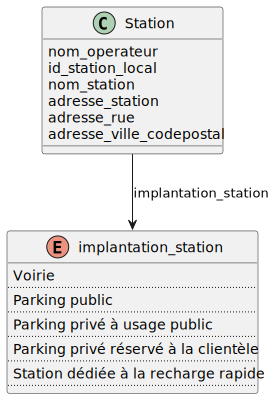

In [12]:
b0.show_semantic_model()

In [16]:
import re
b0.apply(lambda x : pd.Series(re.findall('\S+', x['adresse_ville_codepostal'])),{"adresse_localite": 'string', "adresse_codepostal": 'string', "adresse_pays": 'string', 'col': 'string'})
b0.dataset

,nom_operateur,id_station_local,nom_station,implantation_station,adresse_station,geometry,adresse_rue,adresse_ville_codepostal,adresse_localite,adresse_codepostal,adresse_pays,col
0,Borneco | FR*BHM,756453,BornEco/63dcef1cde530c3ec2928c1e,Voirie,"3 Place Maurice de Sully, Sully-sur-Loire 45...",None,3 Place Maurice de Sully,Sully-sur-Loire 45600 France,Sully-sur-Loire,45600,France,NaN
1,Borneco | FR*BHM,756453,BornEco/63dcef1cde530c3ec2928c1e,Voirie,"3 Place Maurice de Sully, Sully-sur-Loire 45...",None,3 Place Maurice de Sully,Sully-sur-Loire 45600 France,Sully-sur-Loire,45600,France,NaN
2,Borneco | FR*BHM,767307,BornEco/63dcefa3de530c3ec2928c39,Voirie,"Place des Jeux, Donnemarie-Dontilly 77520 ...",None,Place des Jeux,Donnemarie-Dontilly 77520 France,Donnemarie-Dontilly,77520,France,NaN
3,Borneco | FR*BHM,767307,BornEco/63dcefa3de530c3ec2928c39,Voirie,"Place des Jeux, Donnemarie-Dontilly 77520 ...",None,Place des Jeux,Donnemarie-Dontilly 77520 France,Donnemarie-Dontilly,77520,France,NaN
4,Borneco | FR*BHM,782313,BornEco/64255ebeceade60b493082cc,Voirie,"38 Avenue de New York, Paris 75116 France",None,38 Avenue de New York,Paris 75116 France,Paris,75116,France,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,evZen | FR*EVZ,377778,CARF - Bornes Publiques/8C44E3B4-E0FC-406A-A25...,Parking public,"50 Promenade de la Mer, Menton 06500 France",None,50 Promenade de la Mer,Menton 06500 France,Menton,06500,France,NaN
96,evZen | FR*EVZ,377796,CARF - Bornes Publiques/8CF2C967-C80C-4463-B4B...,Parking public,"Avenue de la Paix, Roquebrune-Cap-Martin 06...",None,Avenue de la Paix,Roquebrune-Cap-Martin 06190 France,Roquebrune-Cap-Martin,06190,France,NaN
97,evZen | FR*EVZ,377796,CARF - Bornes Publiques/8CF2C967-C80C-4463-B4B...,Parking public,"Avenue de la Paix, Roquebrune-Cap-Martin 06...",None,Avenue de la Paix,Roquebrune-Cap-Martin 06190 France,Roquebrune-Cap-Martin,06190,France,NaN
98,evZen | FR*EVZ,612871,CARF - Bornes Publiques/97BBD38A-F72F-4418-916...,Parking public,Promenade du Maréchal Leclerc de Hautecloque...,None,Promenade du Maréchal Leclerc de Hautecloque,Menton 06500 France,Menton,06500,France,NaN


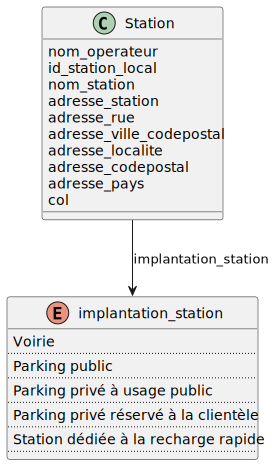

In [17]:
b0.show_semantic_model()

We delete intermediate attributes that we don't want to take into consideration in output RDF data.

In [18]:
b0.delete_attribute("col")
b0.delete_attribute("adresse_ville_codepostal")

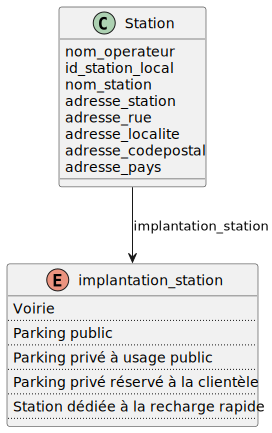

In [19]:
b0.show_semantic_model()

We annotate the created attributes according to schema.org, and document *operateur* class bundle and *Voirie* value of *implantation_station* enumeration bundle.

In [20]:
b0.annotate(attributes={"adresse_station":"https://schema.org/address","adresse_rue":"https://schema.org/streetAddress", "adresse_localite":"https://schema.org/addressLocality","adresse_codepostal":"https://schema.org/postalCode", "adresse_pays":"https://schema.org/addressCountry"})
b1.document(class_definition="L'opérateur est la personne qui exploite l'infrastructure de recharger pour le compte d'un aménageur dans le cadre d'un contrat ou pour son propre compte s'il est l'aménageur.")
dangling_bundles = b0.children()
dangling_bundles["implantation_station"].document(enum_values={"Voirie":"Aménagement et entretien des voies, des chemins ; administration publique qui s'occupe de l'ensemble des voies de communication."})
b0.show(True)

------- Class -------
name : Station
IRI : None
definition : None
	 ------- attributes -------
	 name : nom_operateur
	 IRI : None
	 definition : La dénomination sociale de l'opérateur. L'opérateur est la personne qui exploite l'infrastructure de recharger pour le compte d'un aménageur dans le cadre d'un contrat ou pour son propre compte s'il est l'aménageur. Vous pouvez accéder à cette dénomination exacte sur le site annuaire-entreprises.data.gouv.fr.
	 type : string
	 id : non
	 required : False
	 --------------
	 name : id_station_local
	 IRI : None
	 definition : Identifiant de la station utilisé localement. Si vous n'avez pas d'identifiant unique et que vous souhaitez en récupérer un, vous pouvez vous rendre sur https://heidi.app.etalab.studio. En cas de station qui n'est pas ouverte à l'itinérance, cet identifiant est indispensable.
	 type : string
	 id : oui
	 required : False
	 --------------
	 name : nom_station
	 IRI : None
	 definition : Le nom de la station.
	 type : string

### 3. Loaders

Presently, we propose two loaders:
1. generateOntology
2. generateRDF

#### 3.1 Generate the ontology

In [21]:
g, kpi_results = b0.generateOntology(True)

##### Overview of the generated ontology

In [22]:
kpi_results

,IRI,type,related
0,https://data.grandlyon.com/onto/Station,Class,NA
1,https://data.grandlyon.com/onto/nomOperateur,DatatypeProperty,Station
2,https://data.grandlyon.com/onto/idStationLocal,DatatypeProperty,Station
3,https://data.grandlyon.com/onto/nomStation,DatatypeProperty,Station
4,https://data.grandlyon.com/onto/implantationSt...,ObjectProperty,Station
5,https://data.grandlyon.com/vocab/Implantation_...,ConceptScheme,NA
6,https://data.grandlyon.com/vocab/voirie,Concept,implantation_station
7,https://data.grandlyon.com/vocab/parking_public,Concept,implantation_station
8,https://data.grandlyon.com/vocab/parking_privé...,Concept,implantation_station
9,https://data.grandlyon.com/vocab/parking_privé...,Concept,implantation_station


##### Save the ontology in a file

In [23]:
with open("./results/onto.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

#### 3.2 Generate the RDF data

In [24]:
g_rdf = b0.generateRDF(True)

##### Save the RDf data in a file

In [25]:
with open("./results/instances.ttl", "w") as f:
    f.write(g_rdf.serialize(format="turtle"))